In [1]:
# 資料分析基本模組
import pandas as pd
import numpy as np
 
# 繪製靜態圖
import matplotlib                  
import matplotlib.pyplot as plt
import seaborn as sns                
 
# 繪製動態圖
import plotly as plotly  #pip install plotly             
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
 
# 繪製熱力地圖
import folium            #pip install folium
import folium.plugins
 
# 繪製文字雲
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
# 不要顯示警告訊息
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_taipei = pd.read_csv(r'C:\pyml_scripts\airbnb\listings.csv')
df_taipei.head()

id                          listing_url       scrape_id last_scraped  \
0  271733  https://www.airbnb.com/rooms/271733  20211230161823   2021-12-30   
1  289298  https://www.airbnb.com/rooms/289298  20211230161823   2021-12-30   
2  333362  https://www.airbnb.com/rooms/333362  20211230161823   2021-12-30   
3  357836  https://www.airbnb.com/rooms/357836  20211230161823   2021-12-30   
4  375718  https://www.airbnb.com/rooms/375718  20211230161823   2021-12-30   

                                                name  \
0                  Taipei Rooftop - Whole apartment!   
1  Fabulous Studio in heart of Taipei----Monthly ...   
2                 2min walk to MRT, Quiet good sleep   
3  CENTER CITY GEM 2B1b - Daan District, MRT 2.5 min   
4                 CRèME De La CRèME - CENTER CITY 東區   

                                         description  \
0  Yes! You get the whole apartment. It's nice, i...   
1  Elite area in Dazhi, Zhongshan District.<br />...   
2  2 min walk to Jiannan road mrt<br />quiet neig...   
3  Well-Equipped Condo allowing you to enjoy Taip...   
4  This place is for those whose time is very val...   

                               neighborhood_overview  \
0  A family neighborhood -- very quiet and safe. ...   
1                                                NaN   
2                                                NaN   
3  Centrally located (all times in walking distan...   
4  Centrally located (all times in walking distan...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/8824698/31a49...   242033   
1  https://a0.muscache.com/pictures/cca653f0-6815...  1338052   
2  https://a0.muscache.com/pictures/22564902/de35...  1698423   
3  https://a0.muscache.com/pictures/06b2bedd-8779...  1398361   
4  https://a0.muscache.com/pictures/8474481/1f5be...  1398361   

                                    host_url  ... review_scores_communication  \
0   https://www.airbnb.com/users/show/242033  ...                        4.98   
1  https://www.airbnb.com/users/show/1338052  ...                        4.96   
2  https://www.airbnb.com/users/show/1698423  ...                        4.89   
3  https://www.airbnb.com/users/show/1398361  ...                        4.76   
4  https://www.airbnb.com/users/show/1398361  ...                        5.00   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.82                4.94     NaN                f   
1                   4.61                4.72     NaN                f   
2                   4.64                4.70     NaN                f   
3                   4.81                4.55     NaN                t   
4                   5.00                4.67     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           1   
1                              2                                           2   
2                              1                                           1   
3                             15                                          15   
4                             15                                          15   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.53  
1                                           0              1.77  
2                                           0              0.66  
3                                           0              1.05  
4                                           0              0.05  

[5 rows x 74 columns]

In [3]:
df_taipei.shape

(4222, 74)

In [4]:
df_taipei.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [5]:
df = df_taipei[['id','name','host_id','host_name','neighbourhood_group_cleansed','neighbourhood_cleansed','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']]
df.head()

id                                               name  host_id  \
0  271733                  Taipei Rooftop - Whole apartment!   242033   
1  289298  Fabulous Studio in heart of Taipei----Monthly ...  1338052   
2  333362                 2min walk to MRT, Quiet good sleep  1698423   
3  357836  CENTER CITY GEM 2B1b - Daan District, MRT 2.5 min  1398361   
4  375718                 CRèME De La CRèME - CENTER CITY 東區  1398361   

         host_name  neighbourhood_group_cleansed neighbourhood_cleansed  \
0  Robyn And David                           NaN                    文山區   
1           Herman                           NaN                    中山區   
2             Jojo                           NaN                    中山區   
3           Second                           NaN                    大安區   
4           Second                           NaN                    大安區   

   latitude  longitude        room_type       price  minimum_nights  \
0  25.00581  121.55518  Entire home/apt   $1,150.00              14   
1  25.08091  121.55902  Entire home/apt   $1,907.00              28   
2  25.07893  121.55061  Entire home/apt   $1,204.00             365   
3  25.02703  121.54437  Entire home/apt   $2,487.00              29   
4  25.04178  121.55100  Entire home/apt  $13,831.00               2   

   number_of_reviews last_review  reviews_per_month  \
0                 64  2021-02-07               0.53   
1                186  2021-03-23               1.77   
2                 79  2015-08-26               0.66   
3                123  2020-04-15               1.05   
4                  6  2014-03-10               0.05   

   calculated_host_listings_count  availability_365  
0                               1               174  
1                               2               304  
2                               1               365  
3                              15               173  
4                              15                91

In [6]:
df.isna().sum()

id                                   0
name                                 1
host_id                              0
host_name                            0
neighbourhood_group_cleansed      4222
neighbourhood_cleansed               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1144
reviews_per_month                 1144
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

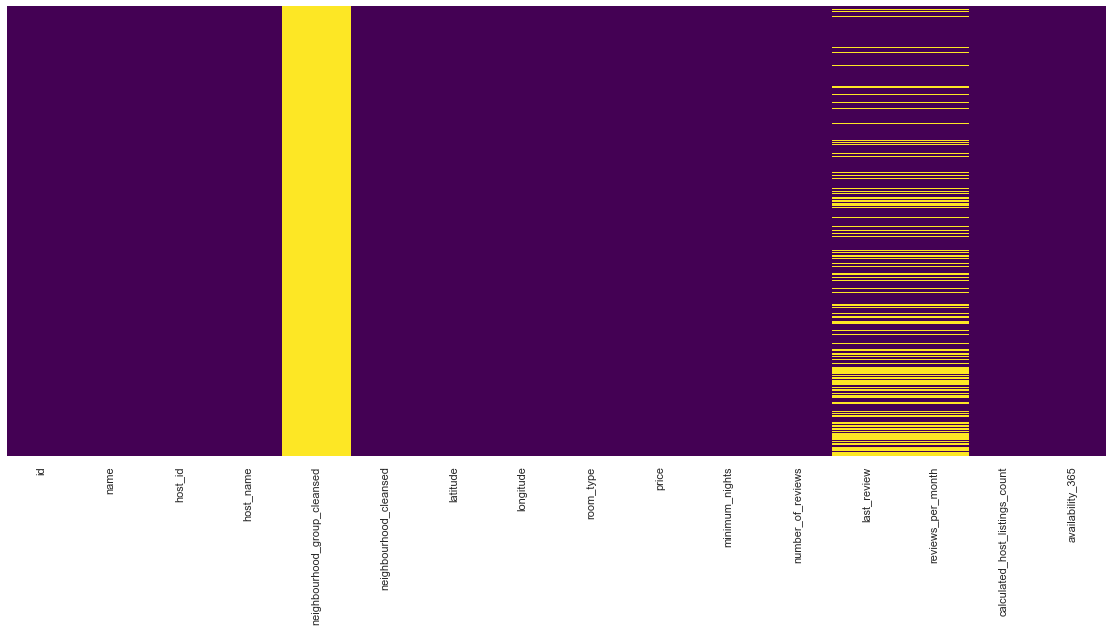

In [7]:
#顯示每個欄位的空值狀態
sns.set(rc={'figure.figsize':(19.7,8.27)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#刪除欄位值大部分都為空值的欄位
df.drop(['neighbourhood_group_cleansed','last_review','reviews_per_month'], inplace=True, axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4222 non-null   int64  
 1   name                            4221 non-null   object 
 2   host_id                         4222 non-null   int64  
 3   host_name                       4222 non-null   object 
 4   neighbourhood_cleansed          4222 non-null   object 
 5   latitude                        4222 non-null   float64
 6   longitude                       4222 non-null   float64
 7   room_type                       4222 non-null   object 
 8   price                           4222 non-null   object 
 9   minimum_nights                  4222 non-null   int64  
 10  number_of_reviews               4222 non-null   int64  
 11  calculated_host_listings_count  4222 non-null   int64  
 12  availability_365                42

In [10]:
df['price'].head()

0     $1,150.00
1     $1,907.00
2     $1,204.00
3     $2,487.00
4    $13,831.00
Name: price, dtype: object

In [11]:
#將price欄位值由字串轉換成數值
df['price_cleansed'] = df['price'].apply(lambda x: float(x.strip('$').replace(',','')))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4222 non-null   int64  
 1   name                            4221 non-null   object 
 2   host_id                         4222 non-null   int64  
 3   host_name                       4222 non-null   object 
 4   neighbourhood_cleansed          4222 non-null   object 
 5   latitude                        4222 non-null   float64
 6   longitude                       4222 non-null   float64
 7   room_type                       4222 non-null   object 
 8   price                           4222 non-null   object 
 9   minimum_nights                  4222 non-null   int64  
 10  number_of_reviews               4222 non-null   int64  
 11  calculated_host_listings_count  4222 non-null   int64  
 12  availability_365                42

In [13]:
df[['price','price_cleansed']]

price  price_cleansed
0      $1,150.00          1150.0
1      $1,907.00          1907.0
2      $1,204.00          1204.0
3      $2,487.00          2487.0
4     $13,831.00         13831.0
...          ...             ...
4217     $377.00           377.0
4218   $2,240.00          2240.0
4219   $2,000.00          2000.0
4220     $873.00           873.0
4221   $3,663.00          3663.0

[4222 rows x 2 columns]

In [14]:
df['price_cleansed'].describe()

count      4222.000000
mean       3316.279962
std       10105.807231
min           0.000000
25%        1000.000000
50%        1703.500000
75%        3025.250000
max      300245.000000
Name: price_cleansed, dtype: float64

<AxesSubplot:xlabel='price_cleansed', ylabel='Density'>

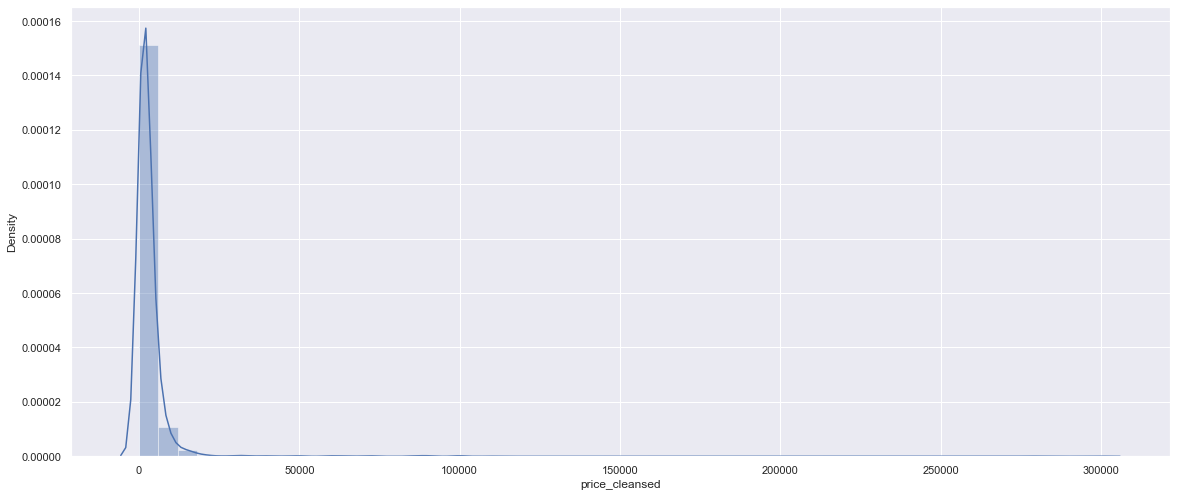

In [15]:
#房價的機率密度函數圖
sns.distplot(df['price_cleansed'])

<AxesSubplot:>

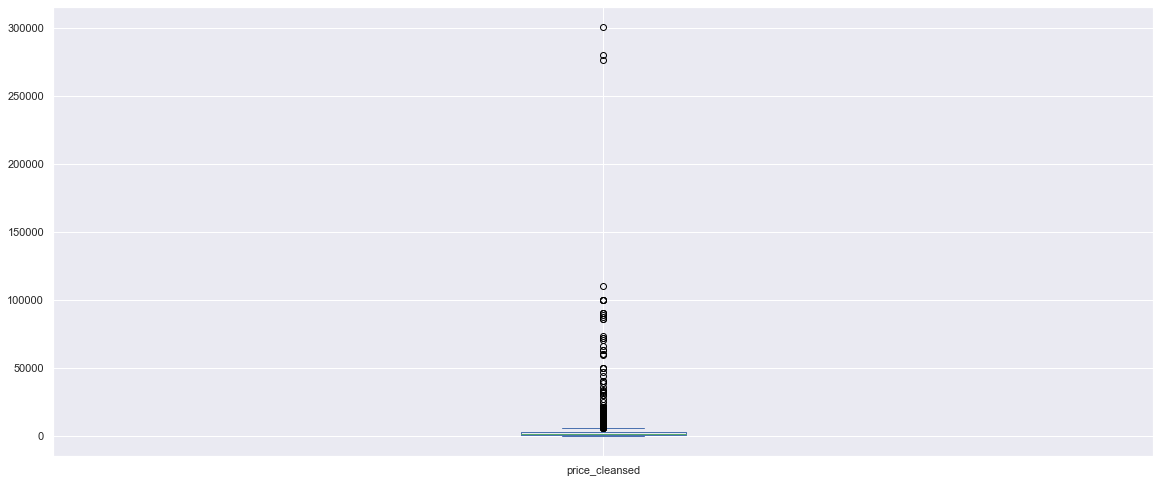

In [16]:
#從房價的機率密度函數與盒型圖來看,有一些特殊房價(過高)
df['price_cleansed'].plot(kind='box')

In [17]:
df[df['price_cleansed']>50000]

id                                               name    host_id  \
231    4738149                 市府捷運站Metro TaipeiCityHall Bunk bed   19235741   
429    8525791                                                NaN   21117128   
571   10661129                                Local Taiwanese APT   38150672   
1026  16024471                                                  0   25612045   
1040  16199949                                                  0   25612045   
1146  17218598      編輯中暫勿申請 不只是開放空間!絕對隱私的落地布簾(可上鎖)舒適的床與工作桌?一樣都沒少!  105039861   
1359  20043720                        Big Terrace for 5 room apt.   58666148   
1747  24742544               尚有空房*古典quaint桂殿蘭宮/獨棟VILLA/可住8人/3房2衛浴  119870232   
1878  25498209  Taipei 101 /Big studio apartment/MRT  7 min(mo...  192431359   
1966  27176566                Superior Double Room,Modern & Cozy.  200978840   
1967  27176647  Modern Room. Free Breakfast, Wifi. 2 Min to Su...  200978840   
1968  27176692     Hollywood King/Twin Bed Room,Spacious & Modern  200978840   
1969  27176857  New Room for 3. Free Breakfast, Wifi, Housekee...  200978840   
1970  27176899    Family Room. Daily Housekeeping. Free Breakfast  200978840   
2074  28283746      編輯中暫勿申請/北歐風格的雪屋雙人房 舒適、交通便利，並提供旅人一切所需，單人入住也划算!  200303887   
2126  28971128                                       樂活公園#溫馨陽光小雅房    9431364   
2185  29762955                          房間一：難得台北景美商圈的唯一像澳洲農場風景的別墅  216961363   
2207  30054428              難得鬧中取靜，景美商圈唯一彷彿是置身澳洲農場的休閒好住宿，蟲鳴鳥叫好風光。  216961363   
2549  33431232                      타이베이  家庭朋友出遊不想分開睡  台北車站、京站2分鐘  248746536   
2551  33431791                         타이베이 京站  北車2分鐘 兩個人也不怕翻身會打架  248746536   
2552  33431794               【20:00入住check-in】紅眼班機別怕到台北沒地方睡 北車2分鐘  248746536   
2553  33431798                         타이베이  小資族首選住宿 ，台北車站 京站 2分鐘  248746536   
2629  34381521              設計師的家Dunhua Villa CBD+ 1 Free parking  119870232   
2671  34933647  已長租請勿下訂謝謝台北-Taipei101-MRT西門町3min-walk舒適四人青年旅社-...   14698617   
2945  38320808  MRT 8 mins, bright, clean & twin room w/ bathroom  291476695   

       host_name neighbourhood_cleansed  latitude  longitude        room_type  \
231         Sher                    信義區  25.04402  121.56333     Private room   
429           蝦咪                    大安區  25.02310  121.54439     Private room   
571      Singing                    中山區  25.05790  121.54361     Private room   
1026         Pei                    中山區  25.06498  121.53366  Entire home/apt   
1040         Pei                    中山區  25.06603  121.53191     Private room   
1146        125巷                    北投區  25.10843  121.51203     Private room   
1359       Candy                    松山區  25.04522  121.55098  Entire home/apt   
1747     Min Min                    松山區  25.04558  121.55135  Entire home/apt   
1878          清輝                    信義區  25.03599  121.56237  Entire home/apt   
1966  Just Sleep                    萬華區  25.04393  121.50642       Hotel room   
1967  Just Sleep                    萬華區  25.04589  121.50799       Hotel room   
1968  Just Sleep                    萬華區  25.04546  121.50624       Hotel room   
1969  Just Sleep                    萬華區  25.04578  121.50682       Hotel room   
1970  Just Sleep                    萬華區  25.04569  121.50649       Hotel room   
2074  Red Studio                    北投區  25.11055  121.51993     Private room   
2126        Nana                    內湖區  25.07093  121.61802     Private room   
2185           李                    文山區  24.99392  121.54661     Private room   
2207           李                    文山區  24.99419  121.54467     Private room   
2549       Sasha                    中山區  25.04918  121.51966       Hotel room   
2551       Sasha                    中山區  25.04918  121.51966       Hotel room   
2552       Sasha                    中山區  25.04918  121.51966       Hotel room   
2553       Sasha                    中山區  25.04918  121.51966       Hotel room   
2629     Min Min                    大安區  25.04432  121.54761  Entire

<AxesSubplot:xlabel='price_cleansed', ylabel='minimum_nights'>

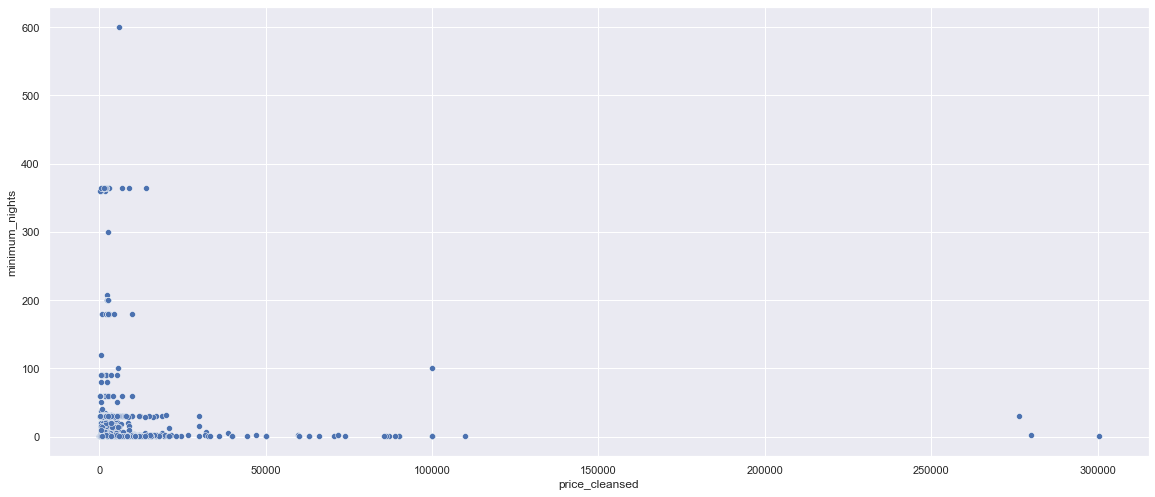

In [18]:
sns.scatterplot(x='price_cleansed',y='minimum_nights',data=df)

findfont: Font family ['Noto Sans TC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Noto Sans TC'] not found. Falling back to DejaVu Sans.


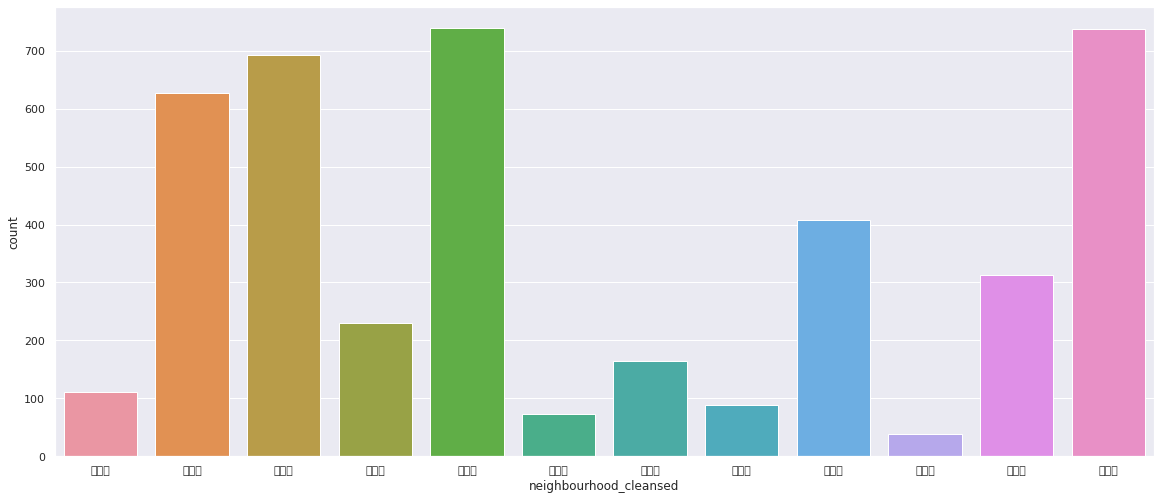

In [19]:
plt.rcParams['font.family']='Noto Sans TC'
plt.rcParams['font.size']=12
sns.countplot(df["neighbourhood_cleansed"])
plt.show()

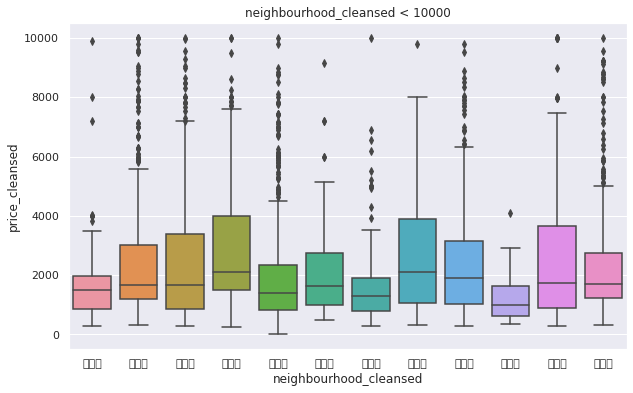

In [20]:
df1 = df[df['price_cleansed'] <= 10000]   # 忽略特殊房價,取每晚房價低於10000資料
plt.figure(figsize=(10,6))
 
sns.boxplot(x = 'neighbourhood_cleansed',
            y = 'price_cleansed',
            data=df1
           )
 
plt.title("neighbourhood_cleansed < 10000")
 
plt.show()

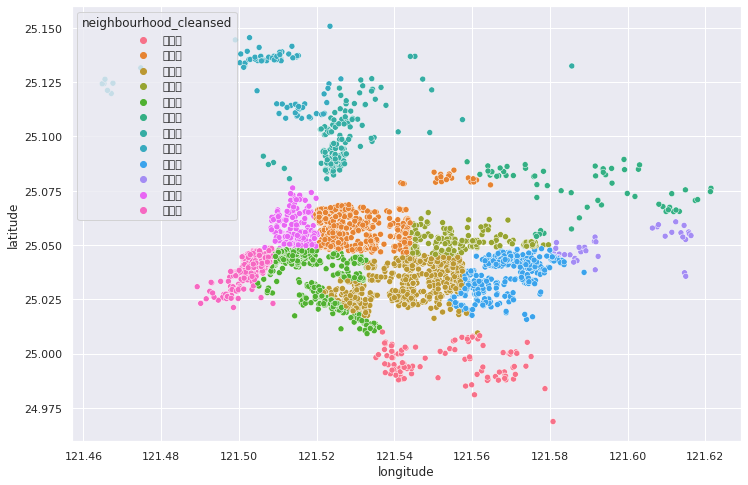

In [21]:
#依據經緯度繪製靜態圖
plt.figure(figsize=(12,8))
 
sns.scatterplot(df.longitude,
               df.latitude,
               hue=df.neighbourhood_cleansed)
 
plt.show()

In [22]:
#繪製熱力圖
import folium
from folium.plugins import HeatMap
 
m = folium.Map([25.051855797335673, 121.54401278619173],zoom_start=11)
 
HeatMap(df[['latitude','longitude']].dropna(),
        radius=10,
        gradient={0.2:'blue',
                  0.4:'purple',
                  0.6:'orange',
                  1.0:'red'}).add_to(m)

#m.add_child(folium.GeoJson('taipei.geo.json', name='geojson'))

display(m)

In [23]:
df['room_type'].value_counts()

Entire home/apt    1980
Private room       1477
Shared room         413
Hotel room          352
Name: room_type, dtype: int64

<AxesSubplot:>

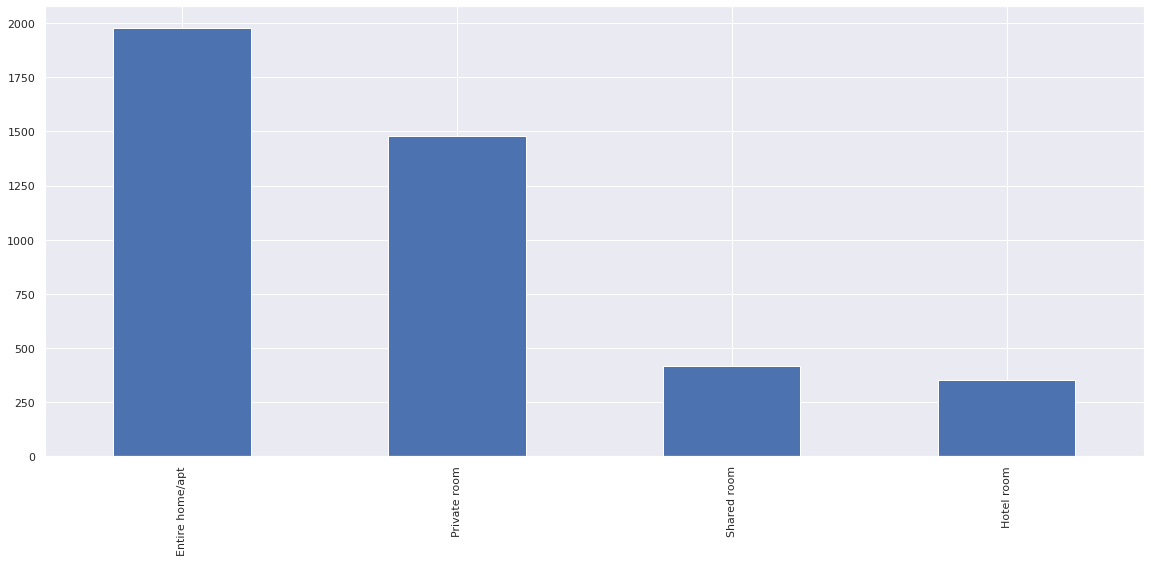

In [24]:
df['room_type'].value_counts().plot(kind='bar')

In [25]:
import plotly.offline as pyo
import plotly.graph_objs as go

df_room = df.groupby('room_type').size()/df['room_type'].count()*100

In [26]:
fig = go.Figure(data=[go.Pie(labels=df_room.index,values=df_room.values,hole=0.5)])
fig.show()

Text(0.5, 1.0, '不同房型位於哪些行政區')

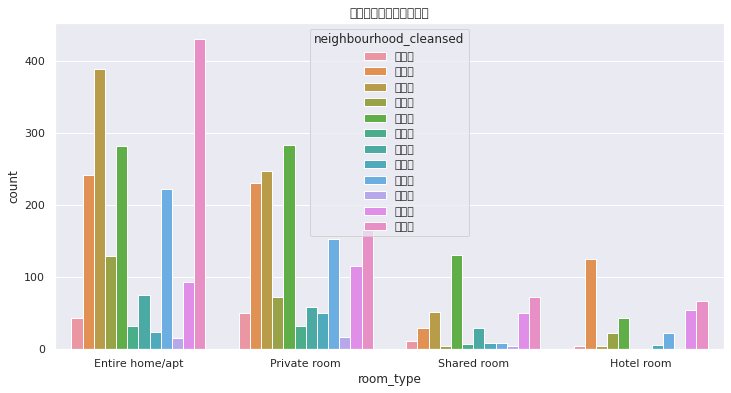

In [27]:
plt.figure(figsize=(12,6))
 
sns.countplot(
    data = df,
    x='room_type',
    hue="neighbourhood_cleansed"
)
 
plt.title("不同房型位於哪些行政區")

In [28]:
df_room_neighbourhood = df.groupby(['room_type','neighbourhood_cleansed']).size().reset_index().rename(columns={0:'number'})
df_room_neighbourhood.head()

room_type neighbourhood_cleansed  number
0  Entire home/apt                    中山區     242
1  Entire home/apt                    中正區     282
2  Entire home/apt                    信義區     223
3  Entire home/apt                    內湖區      32
4  Entire home/apt                    北投區      24

In [29]:
px.bar(df_room_neighbourhood,
       x='neighbourhood_cleansed',
       y='number',
       color='room_type',
       barmode='group')

In [30]:
df_room_neighbourhood_1 = df_room_neighbourhood.pivot_table(df_room_neighbourhood,
                                                            index=['neighbourhood_cleansed'],
                                                            columns=['room_type'],
                                                            aggfunc=np.sum)
df_room_neighbourhood_1

number                                    
room_type              Entire home/apt Hotel room Private room Shared room
neighbourhood_cleansed                                                    
中山區                              242.0      125.0        231.0        29.0
中正區                              282.0       43.0        283.0       131.0
信義區                              223.0       23.0        153.0         9.0
內湖區                               32.0        NaN         33.0         8.0
北投區                               24.0        6.0         50.0         9.0
南港區                               16.0        NaN         17.0         5.0
士林區                               76.0        NaN         58.0        30.0
大同區                               93.0       55.0        115.0        50.0
大安區                              389.0        5.0        247.0        52.0
文山區                               43.0        5.0         51.0        12.0
松山區                              129.0       23.0         73.0         5.0
萬華區                              431.0       67.0        166.0        73.0

<AxesSubplot:xlabel='neighbourhood_cleansed'>

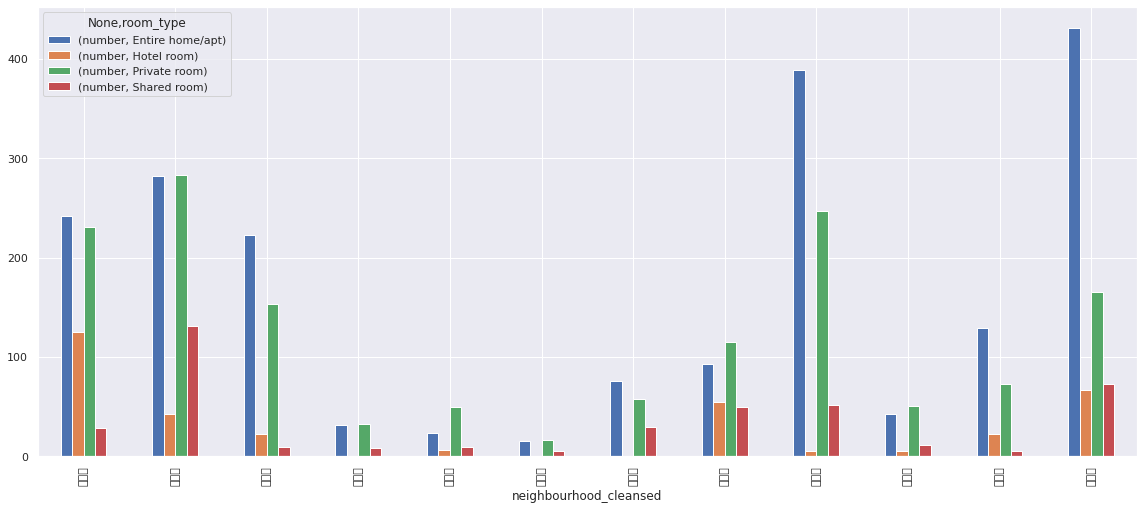

In [31]:
df_room_neighbourhood_1.plot(kind='bar')

<AxesSubplot:xlabel='neighbourhood_cleansed'>

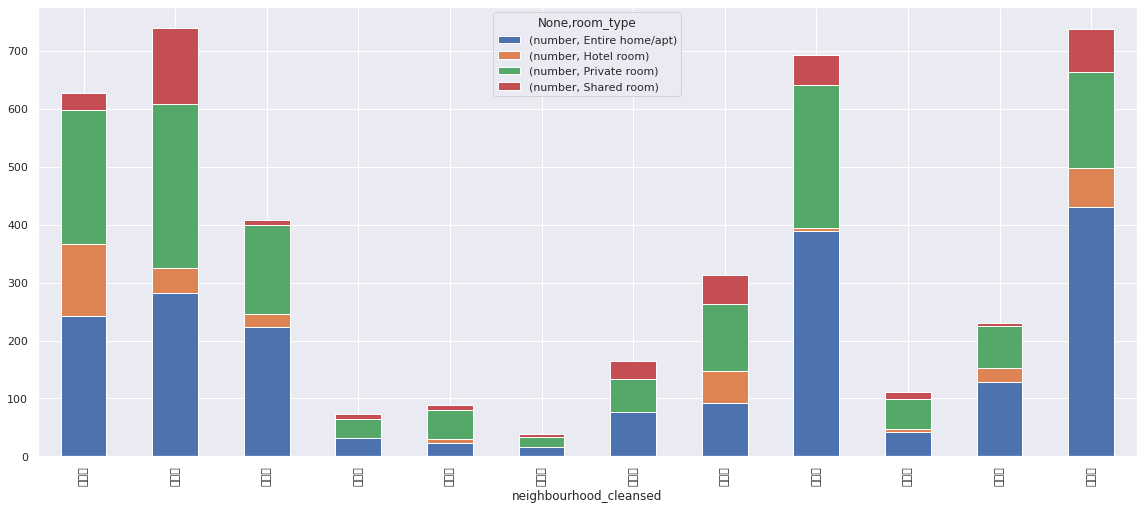

In [32]:
df_room_neighbourhood_1.plot(kind='bar',stacked='true')

<Figure size 864x432 with 0 Axes>

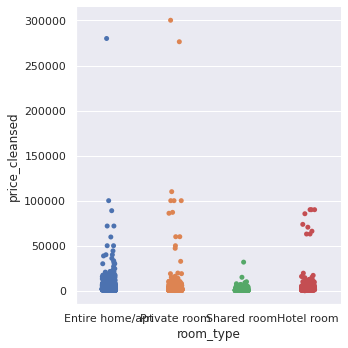

In [33]:
plt.figure(figsize=(12,6))
 
sns.catplot(data=df,x='room_type',y='price_cleansed')
 
plt.show()

(-0.5, 399.5, 199.5, -0.5)

<Figure size 720x432 with 0 Axes>

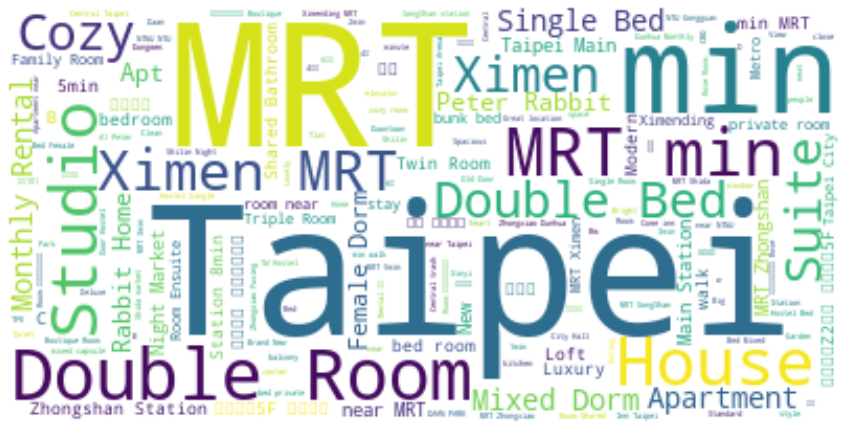

In [34]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.name)
 
wordcloud = WordCloud(
    max_words=200,
    background_color="white").generate(text)
 
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="Bilinear")
 
plt.axis("off")

In [36]:
import jieba
import re

jieba.set_dictionary(r'C:\pyml_scripts\airbnb\dict.txt.big.txt')

tags = list(jieba.cut(text))
words = ' '.join(w for w in re.split(r"\W", str(tags)) if w)

Building prefix dict from C:\pyml_scripts\airbnb\dict.txt.big.txt ...
Dumping model to file cache C:\Users\Admin\AppData\Local\Temp\jieba.u198c99513bea4dcabb7b8ba948690720.cache
Loading model cost 1.395 seconds.
Prefix dict has been built successfully.


(-0.5, 399.5, 199.5, -0.5)

<Figure size 720x432 with 0 Axes>

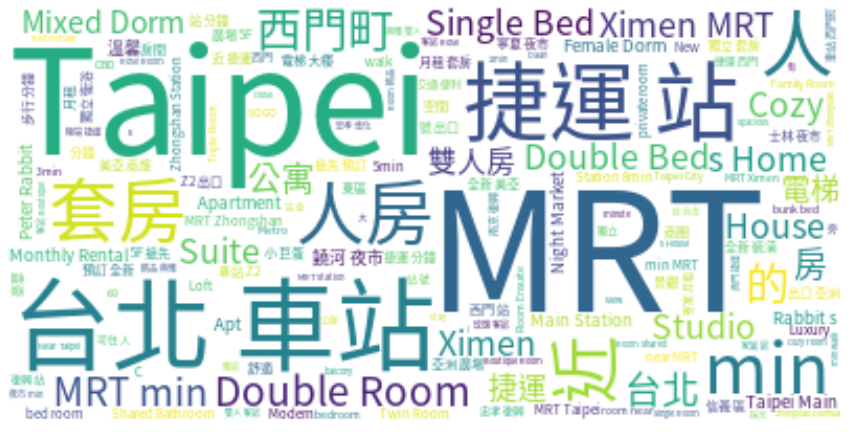

In [38]:
wordcloud = WordCloud(
    font_path=r'C:\pyml_scripts\airbnb\NotoSansTC-Regular.otf',
    max_words=200,
    background_color="white").generate(words)
 
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="Bilinear")
 
plt.axis("off")

In [39]:
#關鍵字數量計數
def split_name(words):
    spl = str(words).split()
    return spl
 
names_count = []
for word in str(words).split(): 
    word = word.lower()  
    names_count.append(word)  

from collections import Counter
result = Counter(names_count).most_common()
result[:5]

[('mrt', 1166), ('room', 767), ('taipei', 697), ('捷運', 676), ('2', 548)]

In [40]:
top_20 = result[0:20]
 
top_20_words = pd.DataFrame(top_20, columns=["words","count"])
top_20_words

words  count
0       mrt   1166
1      room    767
2    taipei    697
3        捷運    676
4         2    548
5        台北    526
6         站    498
7         1    474
8         3    441
9       101    391
10       分鐘    382
11       to    333
12       套房    332
13       車站    328
14      bed    319
15      min    300
16        4    285
17        近    284
18        6    282
19  station    279

[Text(0, 0, 'mrt'),
 Text(1, 0, 'room'),
 Text(2, 0, 'taipei'),
 Text(3, 0, '捷運'),
 Text(4, 0, '2'),
 Text(5, 0, '台北'),
 Text(6, 0, '站'),
 Text(7, 0, '1'),
 Text(8, 0, '3'),
 Text(9, 0, '101'),
 Text(10, 0, '分鐘'),
 Text(11, 0, 'to'),
 Text(12, 0, '套房'),
 Text(13, 0, '車站'),
 Text(14, 0, 'bed'),
 Text(15, 0, 'min'),
 Text(16, 0, '4'),
 Text(17, 0, '近'),
 Text(18, 0, '6'),
 Text(19, 0, 'station')]

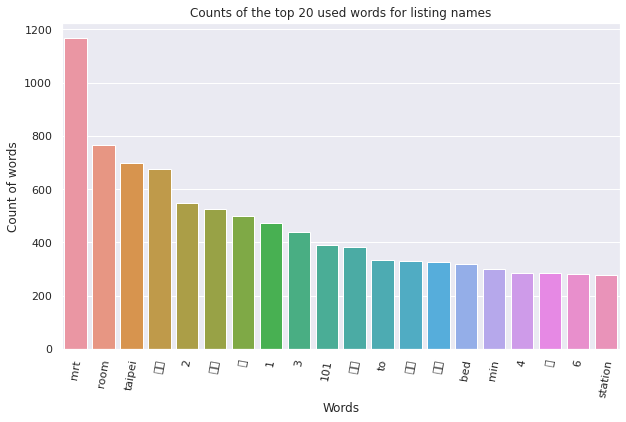

In [41]:
plt.figure(figsize=(10,6))
 
fig = sns.barplot(data=top_20_words,x="words",y="count")
fig.set_title("Counts of the top 20 used words for listing names")
fig.set_ylabel("Count of words")
fig.set_xlabel("Words")
fig.set_xticklabels(fig.get_xticklabels(), rotation=80)

In [42]:
df_review = df.sort_values(by="number_of_reviews",ascending=False).head(1000)
 
df_review.head()

id                                               name   host_id  \
98     1911361                             Taipei 101 Wu's Casita   6378689   
383    7624847                  101k歌室/寵物友善/備電梯/市府捷運站出口4分鐘/收紙本5倍卷  24501553   
1081  16526138  A.K微旅人.捷運西門站6號口3分鐘2人房.樓下西門町Mrt Ximen exit6.3mi...  92448004   
234    4810813                         西門町MING HOUSE西門小套房 2 ~ 4 人  24778674   
442    8794203                  2min to MRT,CBD,Zhongxiao Dunhua.  15706026   

     host_name neighbourhood_cleansed  latitude  longitude        room_type  \
98     Wei Wei                    信義區  25.03161  121.55981     Private room   
383        Ovo                    信義區  25.04150  121.56386  Entire home/apt   
1081       A.K                    萬華區  25.04175  121.50509  Entire home/apt   
234       Ming                    萬華區  25.04366  121.50276     Private room   
442      Sandy                    大安區  25.04239  121.55019  Entire home/apt   

          price  minimum_nights  number_of_reviews  \
98    $1,357.00              30                442   
383   $1,614.00               1                401   
1081  $1,120.00               1                368   
234   $1,460.00               2                363   
442   $1,916.00               2                358   

      calculated_host_listings_count  availability_365  price_cleansed  
98                                 2               365          1357.0  
383                                6               171          1614.0  
1081                              13               363          1120.0  
234                                1               178          1460.0  
442                               20               173          1916.0

In [43]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
 
print("房客評價數量前1000名")
 
mapdf_review = folium.Map([25.051855797335673, 121.54401278619173], zoom_start=12)
 
mapdf_review_rooms_map = plugins.MarkerCluster().add_to(mapdf_review)
 
for lat, lon, label in zip(df_review['latitude'],df_review['longitude'],df_review['name']):
    folium.Marker(location=[lat, lon],icon=folium.Icon(icon="home"),
                popup=label).add_to(mapdf_review_rooms_map)
    
mapdf_review.add_child(mapdf_review_rooms_map)

房客評價數量前1000名


In [44]:
df.head()

id                                               name  host_id  \
0  271733                  Taipei Rooftop - Whole apartment!   242033   
1  289298  Fabulous Studio in heart of Taipei----Monthly ...  1338052   
2  333362                 2min walk to MRT, Quiet good sleep  1698423   
3  357836  CENTER CITY GEM 2B1b - Daan District, MRT 2.5 min  1398361   
4  375718                 CRèME De La CRèME - CENTER CITY 東區  1398361   

         host_name neighbourhood_cleansed  latitude  longitude  \
0  Robyn And David                    文山區  25.00581  121.55518   
1           Herman                    中山區  25.08091  121.55902   
2             Jojo                    中山區  25.07893  121.55061   
3           Second                    大安區  25.02703  121.54437   
4           Second                    大安區  25.04178  121.55100   

         room_type       price  minimum_nights  number_of_reviews  \
0  Entire home/apt   $1,150.00              14                 64   
1  Entire home/apt   $1,907.00              28                186   
2  Entire home/apt   $1,204.00             365                 79   
3  Entire home/apt   $2,487.00              29                123   
4  Entire home/apt  $13,831.00               2                  6   

   calculated_host_listings_count  availability_365  price_cleansed  
0                               1               174          1150.0  
1                               2               304          1907.0  
2                               1               365          1204.0  
3                              15               173          2487.0  
4                              15                91         13831.0

In [45]:
df_price_5000 = df[df['price_cleansed']<5000].head(2500)

mapdf_price = folium.Map([25.051855797335673, 121.54401278619173], zoom_start=12)
 
mapdf_price_rooms_map = plugins.MarkerCluster().add_to(mapdf_price)
 
for lat, lon, label in zip(df_price_5000['latitude'],df_price_5000['longitude'],df_price_5000['name']):
    folium.Marker(location=[lat, lon],icon=folium.Icon(icon="home"),
                popup=label).add_to(mapdf_price_rooms_map)
    
mapdf_price.add_child(mapdf_price_rooms_map)

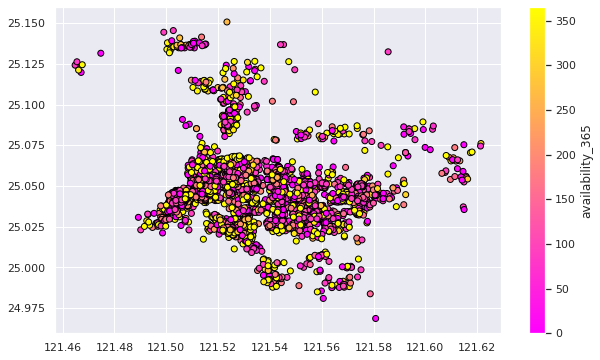

In [46]:
plt.figure(figsize=(10,6))
 
plt.scatter(df.longitude,
            df.latitude,
            c=df['availability_365'],
            cmap="spring",
            edgecolors="black",
            linewidths=1,
            alpha=1
           )
 
cbar=plt.colorbar()
cbar.set_label("availability_365")

In [47]:
px.scatter(df,x="longitude",y="latitude",color="availability_365")

<Figure size 720x432 with 0 Axes>

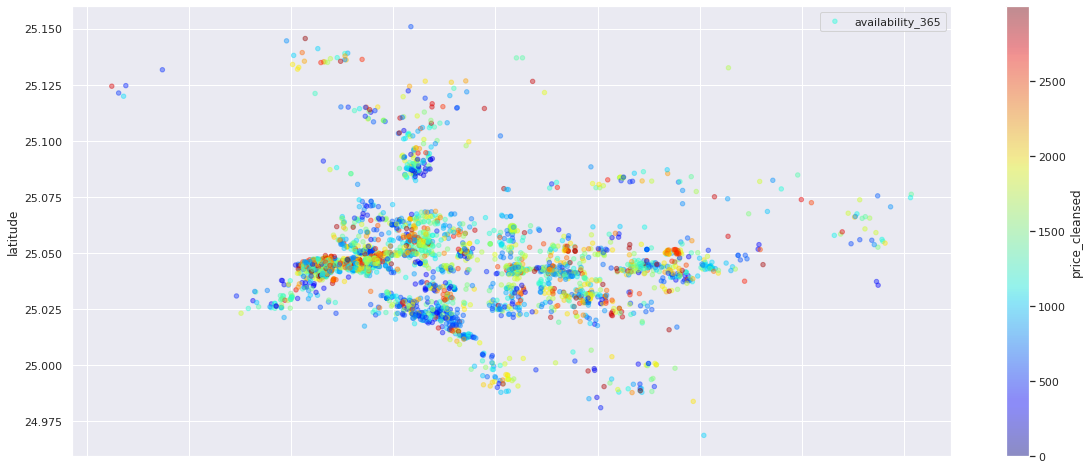

In [48]:
plt.figure(figsize=(10,6))
low_3000 = df[df['price_cleansed'] < 3000]
 
viz1 = low_3000.plot(
  kind="scatter",
  x='longitude',
  y='latitude',
  label='availability_365',
  c='price_cleansed',
  cmap=plt.get_cmap('jet'),
  colorbar=True,
  alpha=0.4)

viz1.legend()

plt.show()

In [49]:
px.scatter(low_3000,
           x='longitude',
           y='latitude',
           color='price_cleansed'
          )

In [50]:
df.loc[(df['calculated_host_listings_count']<=5),'renter_type']='個人'
df.loc[(df['calculated_host_listings_count']<=20) & (df['calculated_host_listings_count']>5),'renter_type']='小型連鎖'
df.loc[(df['calculated_host_listings_count']<=50) & (df['calculated_host_listings_count']>20),'renter_type']='中型連鎖'
df.loc[(df['calculated_host_listings_count']>50),'renter_type']='大型連鎖'

In [51]:
df_renter_type = df.groupby('renter_type').count().id.sort_values(ascending=False)
df_renter_type

renter_type
個人      1959
小型連鎖    1616
中型連鎖     453
大型連鎖     194
Name: id, dtype: int64

<AxesSubplot:xlabel='renter_type'>

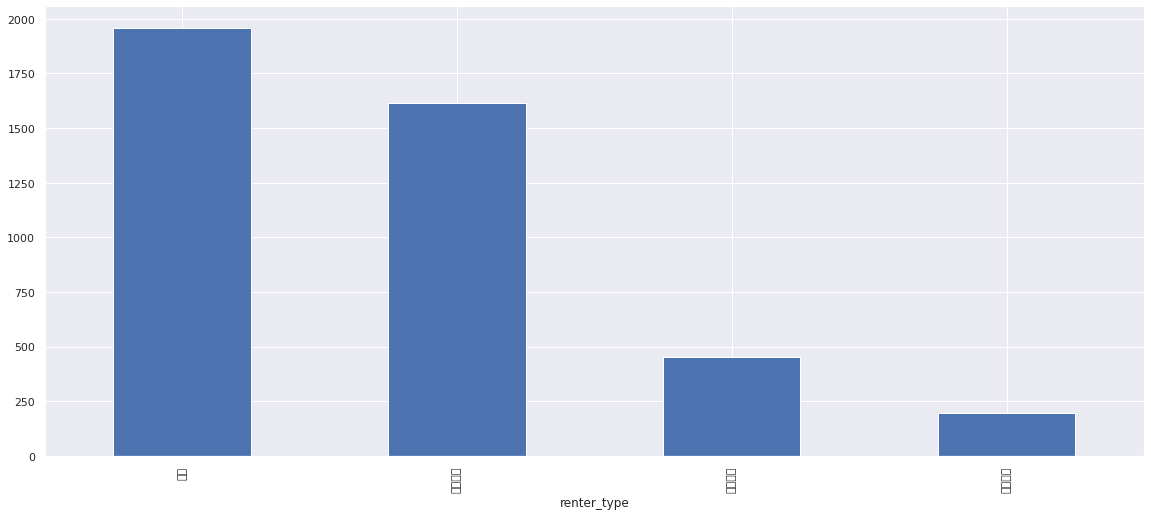

In [52]:
df_renter_type.plot(kind='bar')

In [53]:
df_renter_price=df[['renter_type','price_cleansed']].groupby('renter_type').mean().reset_index()
df_renter_price.sort_values('price_cleansed',ascending=False)

renter_type  price_cleansed
1          個人     3849.524758
3        小型連鎖     3357.081683
0        中型連鎖     1700.169978
2        大型連鎖     1365.432990